In [1]:
import numpy as np
import sympy
from sympy import S, symbols, Function, dsolve, solveset, linsolve, integrate, diff, plot
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
import matplotlib.pyplot as plt

from sympy import Eq, solve

## Занятие 18
## Математический анализ
## Линейные ОДУ второго порядка с постоянными коэффициентами
### Задача 1
Решить ОДУ $3y''+5y'-2y=0$ по формуле из файла с примерами и с помощью dsolve.

In [2]:
x, y, k, C1, C2 = symbols('x y k C_1 C_2')
eq = solveset(sympy.Eq(3 * k ** 2 + 5 * k - 2, 0))
k1, k2 = eq
print("Корни")
display(eq)
print(f"\n{'— ' * 20}\n")
display(Eq(y, C1 * Exp(k1 * x) + C2 * Exp(k2 * x)))
y_f = Function('y')
display(dsolve(Eq(3 * y_f(x).diff(x, 2) + 5 * y_f(x).diff(x) - 2 * y_f(x), 0)))

Корни


FiniteSet(-2, 1/3)


— — — — — — — — — — — — — — — — — — — — 



Eq(y, C_1*exp(-2*x) + C_2*exp(x/3))

Eq(y(x), C1*exp(-2*x) + C2*exp(x/3))

### Задача 2.
Решить задачу Коши:
$$
\left\{
\begin{matrix}
9y''+3y'+y=0\\
y(0)=0\\
y'(0)=2\sqrt3
\end{matrix}
\right.
$$
##### Указание.
Решить с помощью dsolve, затем составить словарь символов решения, ключи - 'x', 'C1', 'C2', а значения - соответствующие элементы из множества  ХХХ.rhs.free_symbols, решить систему линейных относительно С1 и С2 уравнений, описывающих начальные условия.

In [3]:
res = dsolve(Eq(9 * y_f(x).diff(x, 2) + 3 * y_f(x).diff(x) + y_f(x), 0))
symb = sorted(list(res.rhs.free_symbols), key=str)
x_0_y_0 = {x:0, y_f(x):0}
C2 = res.subs(x_0_y_0).lhs
C1 = solve(Eq(res.rhs.subs(symb[1], C2).diff(x), 2 * 3 ** (1 / 2)), symb[0])[0]
C1 = C1.subs(x, 0)
print("Решение:")
res.subs({symb[0] : C1, symb[1] : C2})

Решение:


Eq(y(x), 12.0*exp(-x/6)*sin(sqrt(3)*x/6))

### Индивидуальное задание
Решить с помощью dsolve:
$$
y''' + y'' + y' + y = (4x + 6)e^{2x}.
$$
Построить график $y(x)$ при начальных условиях $y(0) = 4$, $y'(0) = 2$, $y''(0) = 0$.

$$y''' + y'' + y' + y=- 3 x^{2} + 6 x - 2,\qquad y(0)=2,\qquad y'(0)=-3,\qquad y''(0)=-2$$

Eq(y(x), C1*exp(-x) + C2*sin(x) + C3*cos(x) - 3*x**2 + 12*x - 8)


— — — — — — — — — — — — — — — — — — — — 



Eq(C1 + C3 - 8, 2)

Eq(-C1 + C2 + 12, -3)

Eq(-C1 - C2, -2)

False

False

False


— — — — — — — — — — — — — — — — — — — — 



Eq(y(x), -3*x**2 + 12*x - 13*sin(x)/2 + 3*cos(x)/2 - 8 + 17*exp(-x)/2)


— — — — — — — — — — — — — — — — — — — — 



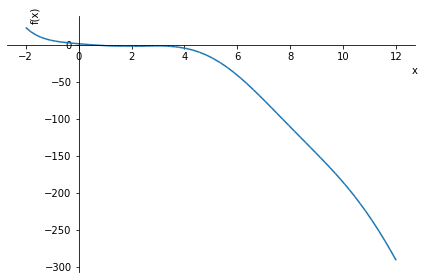

In [4]:
y = Function('y')
y_x = dsolve(y(x).diff(x, 3) + y(x).diff(x, 2) + y(x).diff(x) + y(x) - 
             (-3 * x**2 + 6 * x - 2), y(x))

symb_dict={str(item): item for item in y_x.rhs.free_symbols}

display(y_x)
print(f"\n{'— ' * 20}\n")

y0 = 2
dy0 = -3
d2y0 = -2

system = [sympy.Eq(y_x.rhs.subs(symb_dict['x'], 0), y0),
          sympy.Eq(y_x.rhs.diff(x).subs(symb_dict['x'], 0), dy0),
          sympy.Eq(y_x.rhs.diff(x, 3).subs(symb_dict['x'], 0), d2y0)]
reses = linsolve(system, symb_dict['C1'], symb_dict['C2'], symb_dict['C3'])

display(*system, Eq(C1, reses.args[0][0]), Eq(C2, reses.args[0][1]), Eq(C2, reses.args[0][2]))
print(f"\n{'— ' * 20}\n")

y = y_x.subs({symb_dict['C1'] : reses.args[0][0],
              symb_dict['C2'] : reses.args[0][1],
              symb_dict['C3'] : reses.args[0][2]})

display(y)
print(f"\n{'— ' * 20}\n")

plot(y.rhs, (x, -2, 12))

Хорасанджян Левон, вариант №157